In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

In [2]:
try:
    df = pd.read_csv("Real estate.csv", index_col=0)
except:
    print("Impossibile caricare il file")

In [3]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
X = df[['X2 house age','X3 distance to the nearest MRT station']]
X.shape

(414, 2)

In [5]:
y = df['Y house price of unit area']
y.shape

(414,)

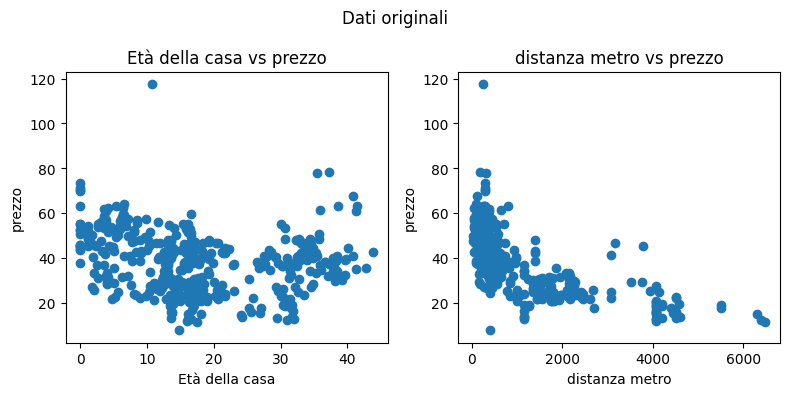

In [6]:
plt.figure(figsize = (8,4))
plt.suptitle("Dati originali")

plt.subplot(1,2,1)
plt.scatter(X['X2 house age'],y)
plt.title("Età della casa vs prezzo")
plt.xlabel("Età della casa")
plt.ylabel("prezzo")

plt.subplot(1,2,2)
plt.scatter(X['X3 distance to the nearest MRT station'],y)
plt.title("distanza metro vs prezzo")
plt.xlabel("distanza metro")
plt.ylabel("prezzo")

plt.tight_layout()
plt.show()

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X,y)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = model.predict(X_test)
y_pred

array([43.77121955, 45.29950248, 33.06256871, 45.32660751, 44.64908572,
       42.98860728, 42.96393346, 40.45387422, 44.84647632, 30.68674009,
       40.20136268, 45.36683935, 31.91401858, 15.79709144, 33.01322106,
       39.34873886, 38.96296362, 36.89560916, 41.06001992, 36.61761545,
       43.74654573, 39.49094606, 48.34128111, 47.716586  , 42.92215805,
       45.22791221, 44.37458837, 39.70291205, 37.75763608, 47.17215624,
       34.52064457, 39.32417118, 32.06882393, 36.38984191, 36.63558754,
       39.32735675, 37.29962691, 28.51525628, 38.43881006, 44.11706912,
       43.8205672 , 33.03789488, 32.67952053, 43.74654573, 34.17521101,
       47.18150506, 46.15743261, 48.17918862, 45.66379022, 46.10808496,
       43.8205672 , 26.61192534, 38.96825801, 29.56437588, 38.79354153,
       16.33002004, 34.99223599, 48.34128111, 37.1372465 , 40.32715194,
       33.03789488, 15.61997807, 47.63292118, 35.68450763, 39.22866145,
       16.33551901, 47.60824735, 37.60598322, 37.17865225, 30.71

In [10]:
print(f"Coefficiente b1: {model.coef_[0]:.2f}, Coefficiente b2: {model.coef_[1]:.2f}")
print(f"Intercetta b0: {model.intercept_:.2f}")

Coefficiente b1: -0.25, Coefficiente b2: -0.01
Intercetta b0: 49.88


In [11]:
errore_quad = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Errore quadratico medio: {errore_quad:.2f}")
print(f"R2: {r2:.2f}")

Errore quadratico medio: 94.69
R2: 0.52


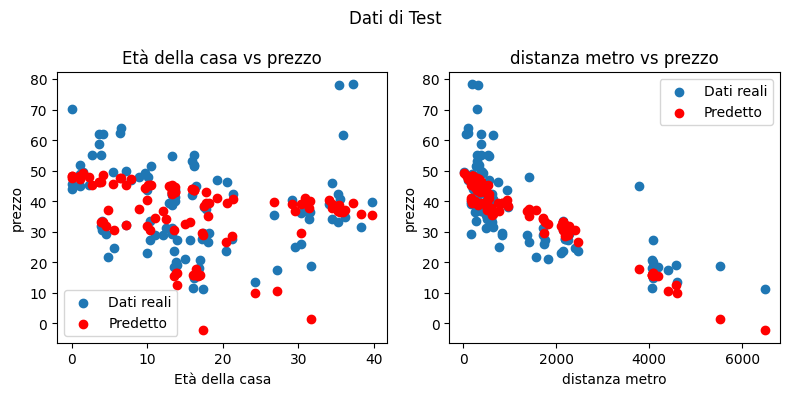

In [12]:
plt.figure(figsize = (8,4))
plt.suptitle("Dati di Test")

plt.subplot(1,2,1)
plt.scatter(X_test['X2 house age'],y_test, label="Dati reali")
plt.scatter(X_test['X2 house age'], y_pred, color='red', label='Predetto')
plt.title("Età della casa vs prezzo")
plt.xlabel("Età della casa")
plt.ylabel("prezzo")
plt.legend()
plt.tight_layout()


plt.subplot(1,2,2)
plt.scatter(X_test['X3 distance to the nearest MRT station'],y_test, label="Dati reali")
plt.scatter(X_test['X3 distance to the nearest MRT station'], y_pred, color='red', label='Predetto')
plt.title("distanza metro vs prezzo")
plt.xlabel("distanza metro")
plt.ylabel("prezzo")
plt.legend()
plt.tight_layout()
plt.show()

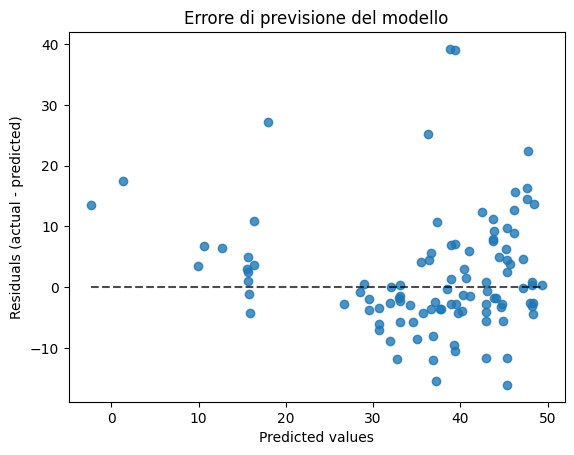

In [13]:
display = PredictionErrorDisplay(y_true = y_test, y_pred = y_pred)
display.plot()
plt.title("Errore di previsione del modello")
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_stand = X_scaler.fit_transform(X)


In [15]:
X_train_stand,X_test_stand, y_train_stand, y_test_stand = train_test_split(X_stand,y)

In [16]:
model.fit(X_train_stand, y_train_stand)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
print(f"Coefficiente b1: {model.coef_[0]:.2f}, Coefficiente b2: {model.coef_[1]:.2f}")
print(f"Intercetta b0: {model.intercept_:.2f}")

Coefficiente b1: -3.34, Coefficiente b2: -8.90
Intercetta b0: 38.25


In [18]:
y_pred_stand = model.predict(X_test_stand)
y_pred_stand

array([48.70397404, 43.28799781, 47.81645432, 34.68154434, 35.11294263,
       34.23262916, 40.22922524, 17.49348958, 33.74907792, 17.28195446,
       36.04704115, 34.5259488 , 38.1195908 ,  2.87157343, 39.99173782,
       17.42024405, 40.02105667, 48.07100203, 39.333689  , 35.82752347,
       36.00987613, 41.11661753, 38.55491936, 47.91262519, 41.32058147,
       11.98460349, 36.58156516, 38.9341664 , 44.92065373, 36.97395814,
       48.52421345, 49.16275228, 43.75135834, 41.93019444, 49.72124042,
       38.99160169, 35.32954906, 34.78742731, 49.78844265, 38.76583008,
       38.4284936 , 37.91435882, 49.40833573, 33.6538988 , 38.410504  ,
       18.22015779, 34.7287896 , 45.67564882, 39.00061634, 39.35792795,
       26.80976577, 42.82473209, 49.78844265, 39.9850751 , 49.62626568,
       48.61217001, 48.01236433, 38.0331089 , 46.75629231, 17.42854873,
       45.82931053, 45.13251766, 32.49438201, 47.33139737, 11.47176958,
       34.65945089, 33.12097734, 33.70388853, 40.28786295, 48.81

Errore quadratico medio: 82.92
R2: 0.49


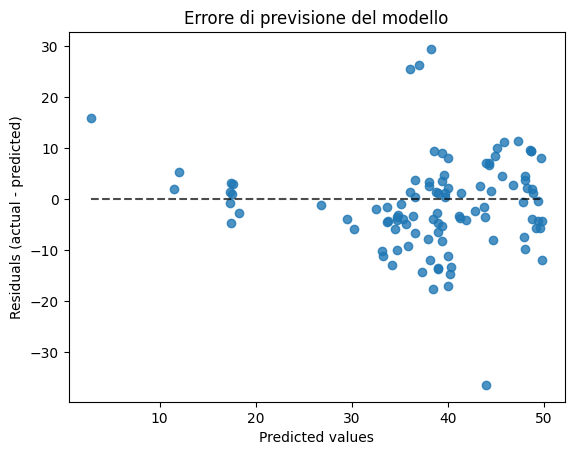

In [19]:
errore_quad = mean_squared_error(y_test_stand, y_pred_stand)
r2 = r2_score(y_test_stand, y_pred_stand)

print(f"Errore quadratico medio: {errore_quad:.2f}")
print(f"R2: {r2:.2f}")

display = PredictionErrorDisplay(y_true = y_test_stand, y_pred = y_pred_stand)
display.plot()
plt.title("Errore di previsione del modello")
plt.show()

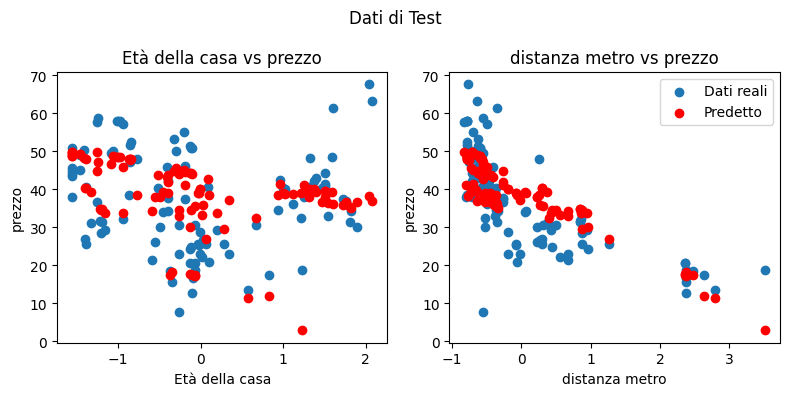

In [20]:
plt.figure(figsize = (8,4))
plt.suptitle("Dati di Test")

plt.subplot(1,2,1)
plt.scatter(X_test_stand[:,0],y_test_stand)
plt.scatter(X_test_stand[:,0], y_pred_stand, color='red', label='Predetto')
plt.title("Età della casa vs prezzo")
plt.xlabel("Età della casa")
plt.ylabel("prezzo")


plt.subplot(1,2,2)
plt.scatter(X_test_stand[:,1],y_test_stand, label="Dati reali")
plt.scatter(X_test_stand[:,1], y_pred_stand, color='red', label='Predetto')
plt.title("distanza metro vs prezzo")
plt.xlabel("distanza metro")
plt.ylabel("prezzo")
plt.legend()
plt.tight_layout()
plt.show()